## Movie Sequel ratings

In [85]:
# Packages:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap, to_hex
import re
import plotly.figure_factory as ff
from numpy import diff

# Display options:
pd.set_option("display.width", 1200)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 500)

## Data

In [80]:
df_franchises = pd.read_csv("franchises.csv")
df_franchises = df_franchises.sort_values(["Franchise", "order"])

In [47]:
df_franchises

,Franchise,Movie,movie_year,averageRating,numVotes,order
164,Alien,Alien,1979.0,8.5,856938.0,1
165,Alien,Aliens,1986.0,8.4,701678.0,2
166,Alien,Alien³,1992.0,6.4,295710.0,3
167,Alien,Alien Resurrection,1997.0,6.2,244244.0,4
168,Alien,Alien vs. Predator,2004.0,5.6,195428.0,5
...,...,...,...,...,...,...
79,X-Men,X-Men: Days of Future Past,2014.0,7.9,700371.0,7
80,X-Men,Deadpool,2016.0,8.0,1001530.0,8
81,X-Men,X-Men: Apocalypse,2016.0,6.9,426154.0,9
82,X-Men,Logan,2017.0,8.1,733713.0,10


In [103]:
df = pd.DataFrame()
franchises = df_franchises["Franchise"].unique()
for i, franc in enumerate(franchises):
    df_i = df_franchises[df_franchises["Franchise"] == franc]
    dx = 0.1
    y = df_i["averageRating"]
    dy = diff(y)/dx
    df_i["variation"] = "Oscilating"
    if sum(dy >= 0) == len(dy):
        df_i["variation"] = "Increasing"
    if sum(dy <= 0) == len(dy):
        df_i["variation"] = "Decreasing"
    if sum(dy == 0) == len(dy):
        df_i["variation"] = "Stable"
    df = pd.concat([df, df_i])

## Plot

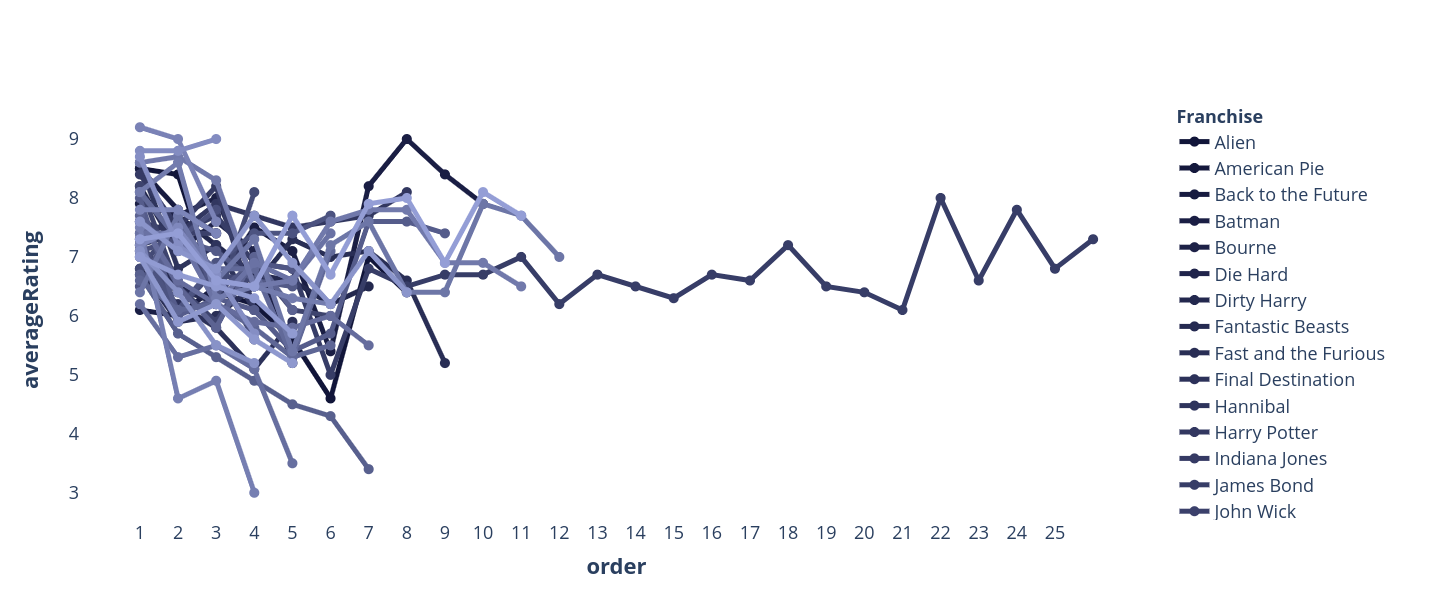

In [52]:
color_var = "Franchise"
x_var = "order"
y_var = "averageRating"
lvls = df_franchises[color_var].unique()
n_levels = len(lvls)
cmap = LinearSegmentedColormap.from_list("my_palette", ["#111539", "#97A1D9"])
my_palette = [to_hex(j) for j in [cmap(i/n_levels) for i in np.array(range(n_levels))]]
fig = go.Figure()
for l, lvl in enumerate(lvls):
    fig.add_trace(
        go.Scatter(
            x = df_franchises[x_var][df_franchises[color_var] == lvl],
            y = df_franchises[y_var][df_franchises[color_var] == lvl],
            mode = "lines+markers",
            line = {
                "width": 5,
                "color": my_palette[l]
            },
            marker = {
                "size": 10,
                "color": my_palette[l]
            },
            name = lvl,
            hovertemplate =  "<b>" + x_var + ": %{x:}<br>" +
                             y_var + ": %{y:}<br>" + 
                             color_var + ": " + lvl + 
                             "</b><extra></extra>"
        )
    )
fig.update_xaxes(
    tickmode = "array",
    tickvals = np.arange(1, df_franchises["order"].max()).astype(int)
)
fig.update_layout(
    height = 600,
    xaxis_title = "<b>" + x_var + "</b>" ,
    yaxis_title = "<b>" + y_var + "</b>",
    font = dict(
        size = 18
    ),
    showlegend = True,
    legend_title_text = "<b>" + color_var + "</b>",
    plot_bgcolor = "white",
    hoverlabel = dict(
        font_size = 20,
        font_family = "Rockwell"
    )
)
fig.show()
